# End-to-end dog breed classification project

##1. Problem definition

We are given an image of a dog and we have to predict the breed of the dog.

##2. Data
The data we are using is from kaggle's dog breed identification competition.
https://www.kaggle.com/c/dog-breed-identification/overview

##3. Evaluation

Submissions are evaluated on Multi Class Log Loss between the predicted probability and the observed target.

##4. Features

Some information about the data:

* The dataset is composed of images of  dogs (Unstructured data) so it is best to use deep learning/transfer learning
* There are 120 different classes i.e. 120 different breeds of dogs
* There are 10,200+ files in the training data.
* There are 10,400+ files in the testing data.

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
#Unzip the data into google drive
# !unzip "dog-breed-identification.zip" -d "Dog-breed-classification-data"

In [3]:
import zipfile

In [4]:
# zip_file_path="dog-breed-identification.zip"
# extract_to_path="Dog-breed-classification-data"
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_to_path)
# print(f"Successfully unzipped '{zip_file_path}' to '{extract_to_path}'")

## Getting our workspace ready

* Importing Tensflow 2.x
* Importing tensorflow hub
* Connect to a GPU

In [5]:
 #pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

In [1]:
#Importing required libraries
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version: ",tf.__version__)
print("TF Hub version: ",hub.__version__)

2025-07-21 18:26:38.155016: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-21 18:26:38.276025: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753122398.303502     424 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753122398.313110     424 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-07-21 18:26:38.408557: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

TF Version:  2.18.0
TF Hub version:  0.16.1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Getting our data ready

To make our data readable to the machine we want it to be in a numerical format. So we  wil convert our images to tensors (numerical representation)

In [4]:
#Checking out the labels of our data
import pandas as pd
labels_csv=pd.read_csv("Dog-breed-classification-data/labels.csv")
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [5]:
# labels_csv["breed"].value_counts().plot.bar(figsize=(30,5))

In [6]:
#Saving the filenames of images
filenames=[]
for fname in labels_csv["id"]:
  file="Dog-breed-classification-data/train/"+fname+".jpg"
  filenames.append(file)

len(filenames)

10222

In [7]:
import os
len(os.listdir("Dog-breed-classification-data/train"))

10222

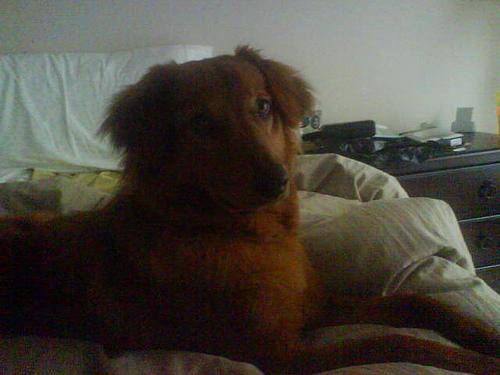

In [8]:
from IPython.display import Image
Image(filename=filenames[1000])

In [9]:
labels_csv["breed"][1000]

'irish_setter'

In [10]:
labels=labels_csv["breed"]
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'],
      shape=(10222,), dtype=object)

In [11]:
#Checking if no of labels match no of images
if len(labels)==len(filenames):
  print("No of labels matches the number of filenames!")
else:
  print("No of labels do not match no of filenames please check directory!")

No of labels matches the number of filenames!


In [12]:
#Creating arrayt of unique breeds
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [13]:
#Converting a single label into an array of booleans
labels[0]==unique_breeds

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [14]:
#Converting and saving all labels into an array of booleans
bool_labels=[]
for label in labels:
  bool_labels.append(label==unique_breeds)
len(bool_labels)

10222

Now the array bool_labels is composed of true/false  values.
True at the index which corresponds to the index of the breed in unique_breeds. False otherwise

In [15]:
print(labels[0]) #Actual value of label(breed)
print(np.where(unique_breeds==labels[0]))  #Index where it occurs in the unique breeds aarray
print(bool_labels[0].argmax())  #Index where it occurs in the bool_labels array
print(bool_labels[0].astype(int))  #Bool_labels array

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Splitting the data into train and validation splits

In [16]:
x=filenames
y=bool_labels

Since our train dataset is very large we will be experimenting with only ~1000 records for experimentation

In [17]:
NUM_SAMPLES=1000 #@param {type:'slider',min:1000,max:10222,step:1000}

In [18]:
#Splitting into train and  val sets
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x[:NUM_SAMPLES],
                                             y[:NUM_SAMPLES],
                                             test_size=0.2)

len(x_train),len(y_train),len(x_val),len(y_val)

(800, 800, 200, 200)

In [19]:
x_train[:2],x_val[:2],y_train[:2],y_val[:2]

(['Dog-breed-classification-data/train/0ca9280205bd68d201e1d708db3f209d.jpg',
  'Dog-breed-classification-data/train/155052199dfac47b3a1ccbea97ce648c.jpg'],
 ['Dog-breed-classification-data/train/0998eda08cdb14648e444c15f06658af.jpg',
  'Dog-breed-classification-data/train/07096719a671e1737b829bd1a88f1dbf.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, F

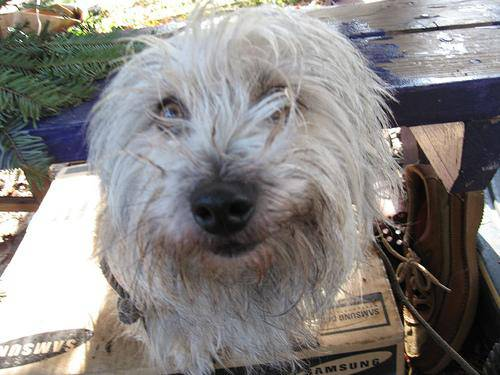

In [20]:
Image(filename=x_train[0])

In [21]:
unique_breeds[20]

'bouvier_des_flandres'

## Preprocessing images(Turning images to Tensors!)

Workflow:
1. Take an image filepath as input
2. use Tensorflow to read the file and save it to `image`
3. Turn the `image` into Tensor
4. Resize the `image` to size: (224,224)
5. Return the modified image

In [22]:
from matplotlib.pyplot import imread
image=imread(x_train[0])
image.shape

(375, 500, 3)

In [23]:
image

array([[[ 53,  93,  59],
        [ 99, 134, 102],
        [ 86, 112,  85],
        ...,
        [210, 211, 216],
        [210, 211, 216],
        [209, 210, 215]],

       [[ 70, 103,  72],
        [ 64,  93,  63],
        [ 66,  89,  61],
        ...,
        [209, 210, 215],
        [211, 211, 219],
        [212, 213, 218]],

       [[ 63,  86,  57],
        [ 58,  77,  49],
        [ 79,  92,  66],
        ...,
        [189, 192, 199],
        [190, 193, 202],
        [191, 194, 201]],

       ...,

       [[251, 251, 243],
        [252, 249, 240],
        [252, 248, 237],
        ...,
        [ 15,  15,  15],
        [ 11,  11,  11],
        [  8,   8,   8]],

       [[255, 254, 248],
        [255, 255, 246],
        [255, 252, 244],
        ...,
        [ 18,  18,  18],
        [ 13,  13,  13],
        [ 10,  10,  10]],

       [[247, 240, 234],
        [245, 236, 229],
        [242, 233, 226],
        ...,
        [ 20,  20,  20],
        [ 14,  14,  14],
        [ 10,  10,  10]]

In [24]:
#Creating tensor
tf.constant(image)

I0000 00:00:1753122437.489747     424 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3539 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[ 53,  93,  59],
        [ 99, 134, 102],
        [ 86, 112,  85],
        ...,
        [210, 211, 216],
        [210, 211, 216],
        [209, 210, 215]],

       [[ 70, 103,  72],
        [ 64,  93,  63],
        [ 66,  89,  61],
        ...,
        [209, 210, 215],
        [211, 211, 219],
        [212, 213, 218]],

       [[ 63,  86,  57],
        [ 58,  77,  49],
        [ 79,  92,  66],
        ...,
        [189, 192, 199],
        [190, 193, 202],
        [191, 194, 201]],

       ...,

       [[251, 251, 243],
        [252, 249, 240],
        [252, 248, 237],
        ...,
        [ 15,  15,  15],
        [ 11,  11,  11],
        [  8,   8,   8]],

       [[255, 254, 248],
        [255, 255, 246],
        [255, 252, 244],
        ...,
        [ 18,  18,  18],
        [ 13,  13,  13],
        [ 10,  10,  10]],

       [[247, 240, 234],
        [245, 236, 229],
        [242, 233, 226],
        ...,
        [ 20,  20,  2

Workflow:
1. Take an image filepath as input
2. use Tensorflow to read the file and save it to `image`
3. Turn the `image` into Tensor
4. Convert the colour channel values from (0,225) to (0,1)
5. Resize the `image` to size: (224,224)
6. Return the modified image

In [67]:
# Creating a generalised function that does this

#define image size
IMG_SIZE=299

def process_image(image_path):
  #Read the file
  image=tf.io.read_file(image_path)

  #Turn the image into tensor with 3 channels(RGB)
  image=tf.image.decode_jpeg(image,channels=3)

  #Convert the colour channels to (0,1)
  image=tf.image.convert_image_dtype(image,tf.float32)

  #Resize the image to (224,224)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image

## Turning our data into batches

If we try to train our model on all 10000+ rows at once, they might not fit into memory
Hence we train our model by feeding it only few rows at a time (batches of rows).
Each batch has 32 **Tensor Tuples** that look like `(image,label)`

In [31]:
#Creating a function to return a Tensor Tuples
def create_tuples(image_path,label):
  image=process_image(image_path)
  return image,label

In [32]:
#Creating a function that return data batches
BATCH_SIZE=32
def create_batches(x,y=None,batch_size=BATCH_SIZE,valid_set=False,test_set=False):
  if test_set:
    print("Creating test data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x))) #Only for x as no labels for test set
    data=data.map(process_image)
    data_batch=data.batch(batch_size)
    return data_batch
  elif valid_set:
    print("Creating valid set batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data=data.map(create_tuples)
    data_batch=data.batch(batch_size)
    return data_batch
  else:
    print("Creating training set batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data=data.shuffle(buffer_size=len(x))
    data=data.map(create_tuples)
    data_batch=data.batch(batch_size)
  return data_batch

In [33]:
train_batch=create_batches(x_train,y_train)
val_batch=create_batches(x_val,y_val,valid_set=True)

Creating training set batches...
Creating valid set batches...


In [34]:
train_batch.element_spec,val_batch.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualising images in a batch

* next(batch.as_numpy_iterator()) returns the next set of 32 tensor tuples as a numpy array

In [ ]:
import matplotlib.pyplot as plt
def plot_25_samples(images,labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis("off")

In [ ]:
# train_images,train_labels=next(train_batch.as_numpy_iterator())
# plot_25_samples(train_images,train_labels)

In [ ]:
# val_images,val_labels=next(val_batch.as_numpy_iterator())
# plot_25_samples(val_images,train_labels)

## Building a model

For building our model, we need the following data:
* The input shape(shape of the tensors)
* The output shape(shape of the labels)
* The url of the model we want to use(Tensorflow Hub)

In [35]:
train_batch.element_spec

(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))

Therefore the shape of our input data is [None,224,224,3]
and the shape of our output data is True/False array of size 120.

In [36]:
INPUT_SHAPE=[IMG_SIZE,IMG_SIZE,3]
OUTPUT_SHAPE=120

In [37]:
#Model URL from tensorflow hub
# MODEL_URL="https://tfhub.dev/google/imagenet/inception_v3/classification/5"
MODEL_URL="https://tfhub.dev/google/imagenet/resnet_v2_101/classification/5"

Creating a function that:
* Takes the input size, output size and our model url as parameters.
* Defines layers in a Keras model in sequential fashion.
* Compiles the model(says it should be evaluated and improved)
* Builds the model(tells the model the input shape it'll be getting)
* Returns the model

In [38]:
import tensorflow_hub as hub

In [39]:
import tensorflow_hub as hub
import tensorflow as tf
import tf_keras

def create_model(input_size=INPUT_SHAPE,output_size=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building model with: ",model_url)

  # Define layers
  hub_layer = hub.KerasLayer(model_url, input_shape=input_size, trainable=False) # Layer 1 (input layer)
  dense_layer = tf_keras.layers.Dense(units=output_size, activation="softmax")  # Layer 2 (Output layer)
  model=tf_keras.Sequential()
  model.add(hub_layer)
  model.add(dense_layer)

  # Compile the model
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf_keras.optimizers.Adam(),
                metrics=["accuracy"])

  #Build the model
  #model.build(input_size) # Building is not needed when input_shape is specified

  #Return the model
  return model

In [40]:
model=create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/resnet_v2_101/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              44677609  
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 44797849 (170.89 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 44677609 (170.43 MB)
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions that can be used while training the model to do things like: save its progress, monitor its progress at each step, stop training the model if it stops improving

We'll create 2 callbacks:
1. Tensorboard: Helps keep track of our models progress
2. Early stopping callback which keeps our model from training for too long

### 1. Tensorboard callback

steps:
* Load the Tensorboard notebook extension
* Create a tensorboard callback which is able to save logs to a directory and pass it to our model's fit() function
* visualize our models training logs with the %tensorboard magic function(done after model training)

In [43]:
%load_ext tensorboard

In [45]:
import datetime
import os
from tf_keras.callbacks import TensorBoard

def create_tensorboard_callback():
  logdir=os.path.join("drive/MyDrive/Dog-breed-classification-data/logs",
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) #This line creates a new file each time this function is called.
  # Use a simpler TensorBoard callback initialization
  return TensorBoard(log_dir=logdir)

### 2. Early stopping callback

Early stopping helps prevent our model from overfitting by stopping training if certain evaluation metric stops improving

In [53]:
early_stopping=tf_keras.callbacks.EarlyStopping(monitor="val_accuracy",  #This is the metric which this callback will monitor
                                                patience=3)  # This is the no of records after which if the metric remains unchanged, model will stop training

## Training a model(on a subset of data)

In [50]:
NUM_EPOCHS=100 #@param {type:"slider",min:10,max:100,step:10}

In [51]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Create a function which trains a model. Steps:
* Create a model using `create_model()`
* Setup a Tensorboard callback using `create_tensorboard_callback()`
* Call the `fit()` function of our model and pass it the parameters: training data, validation data, no of epochs and the callbacks we are using.
* Return the trained model.

In [54]:
def train_model(train_batch=train_batch,val_batch=val_batch):

  #Create a model
  model=create_model()

  #Create a tensorboard callback()
  tensorboard=create_tensorboard_callback()

  #Fit the model
  model.fit(x=train_batch,
            validation_data=val_batch,
            epochs=NUM_EPOCHS,
            callbacks=[tensorboard,early_stopping])

  #Return the model
  return model

# model=train_model()

Our model is overfitting as it is performing much better on the training set over the validation set

In [48]:
#%tensorboard --logdir drive/MyDrive/Dog-breed-classification-data/logs

## Making and evaluation predictions on the validation data batch

In [49]:
preds=model.predict(val_batch,verbose=1)
preds

7/7 [==============================] - 1s 68ms/step


array([[3.0253589e-04, 2.6657584e-04, 2.0305431e-03, ..., 3.5159686e-03,
        1.0701679e-04, 6.3000611e-05],
       [5.7621008e-05, 6.8741478e-04, 1.7663198e-04, ..., 8.4390491e-04,
        8.3460221e-03, 5.2779429e-05],
       [1.4317232e-04, 1.0941459e-04, 5.7290039e-05, ..., 9.3905322e-02,
        6.1485078e-04, 4.4128094e-03],
       ...,
       [9.8677861e-05, 4.8704856e-06, 1.7385939e-04, ..., 3.7719074e-04,
        8.8143621e-05, 9.3643212e-06],
       [4.0503073e-06, 2.0347830e-05, 1.6335688e-04, ..., 7.2396915e-06,
        8.6832770e-05, 1.1547092e-05],
       [1.1151747e-03, 2.4517227e-04, 2.1561170e-06, ..., 1.7417670e-03,
        4.9984599e-05, 9.1655707e-01]], shape=(200, 120), dtype=float32)

In [50]:
preds[0].argmax()

np.int64(94)

In [51]:
unique_breeds[83]

'otterhound'

Creating  a function to get the human readable labels that have been predicted from the probabilities array `preds`

In [ ]:
def get_predicted_label(preds,n):
  return unique_breeds[np.argmax(preds[n])]
get_predicted_label(preds,46)


'borzoi'

To compare these predicted labels to the truth labels, we will have to unbatch the `val_batch`.

In [ ]:
def unbatchify(val_batch):
  images=[]
  labels=[]
  for image,label in val_batch.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(label)
  return images,labels


images,labels=unbatchify(val_batch)
images[46],get_predicted_label(labels,46)

(array([[[0.2947821 , 0.37713507, 0.21635073],
         [0.31090194, 0.3932549 , 0.23283823],
         [0.32603866, 0.40838957, 0.25545248],
         ...,
         [0.25640866, 0.32302278, 0.197563  ],
         [0.25904348, 0.3256576 , 0.19276826],
         [0.14387392, 0.21048808, 0.06951292]],
 
        [[0.35644123, 0.4387942 , 0.27816743],
         [0.36464927, 0.44699854, 0.2867394 ],
         [0.36235476, 0.4443287 , 0.29214552],
         ...,
         [0.34232292, 0.400595  , 0.28017828],
         [0.31707633, 0.37542352, 0.25418106],
         [0.27222458, 0.33057544, 0.20175646]],
 
        [[0.32923725, 0.41159022, 0.25864902],
         [0.36068094, 0.44285005, 0.29027653],
         [0.38049302, 0.45892438, 0.31382632],
         ...,
         [0.28850666, 0.3192227 , 0.22551946],
         [0.22816728, 0.2624959 , 0.15793437],
         [0.31361404, 0.34812033, 0.2430258 ]],
 
        ...,
 
        [[0.48473474, 0.57832706, 0.33663455],
         [0.41465402, 0.5082463 , 0.26655

In [ ]:
# plt.imshow(images[46])
# plt.xticks([])
# plt.yticks([])
# plt.title(f"Predicted: {get_predicted_label(preds,46)}, Proba: {np.max(preds[46])*100:0.2f}, True: {get_predicted_label(labels,46)}");

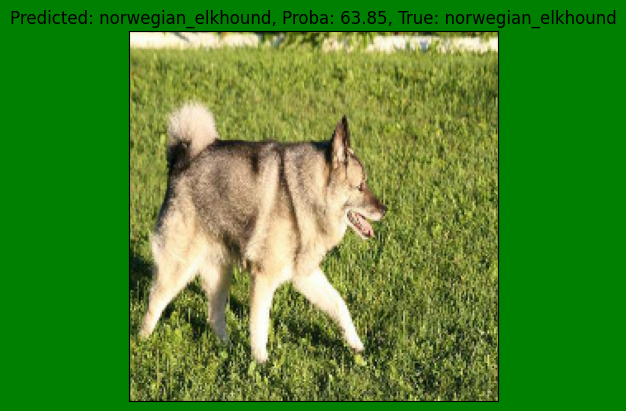

In [ ]:
#Creating a function that does this for the n'th prediction
def plot_pred(predictions,images,labels,n):
  pred=get_predicted_label(predictions,n)
  true=get_predicted_label(labels,n)

  fig,ax=plt.subplots()

  if(pred==true):
    fig.set_facecolor("green")
  else:
    fig.set_facecolor("red")

  ax.imshow(images[n])
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f"Predicted: {pred}, Proba: {np.max(predictions[n])*100:0.2f}, True: {true}")

plot_pred(preds,images,labels,44)

Now we have made a function to check the top prediction of our model and compare with the true label. Lets create a function that can figure out the top 10 predictions of our model and plot it on a bar graph.

In [ ]:
def plot_top_10_preds(preds,labels,n):
  top_10_indexes=preds[n].argsort()[-10:][::-1]
  top_10_preds_values=preds[n][top_10_indexes]
  top_10_preds_labels=unique_breeds[top_10_indexes]

  top_10_plot=plt.bar(np.arange(len(top_10_preds_labels)),
                      top_10_preds_values,
                      color="grey")
  plt.xticks(np.arange(len(top_10_preds_labels)),
             labels=top_10_preds_labels,
             rotation="vertical")
  true_label=unique_breeds[np.argmax(labels[n])]
  if true_label in top_10_preds_labels:
    top_10_plot[np.where(top_10_preds_labels==true_label)[0][0]].set_color("green")
  else:
    print("+1")

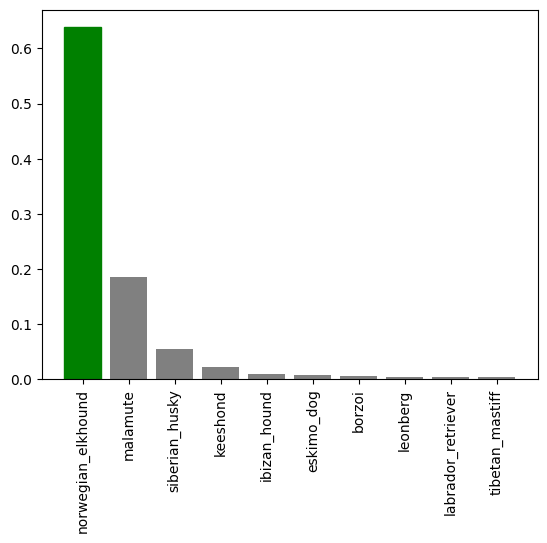

In [ ]:
plot_top_10_preds(preds,labels,44)

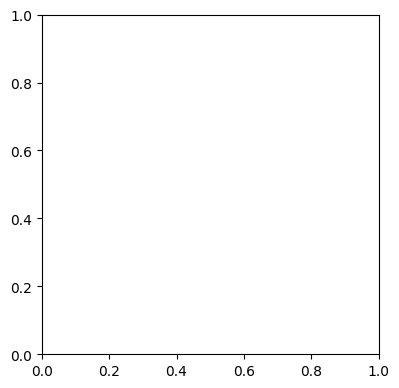

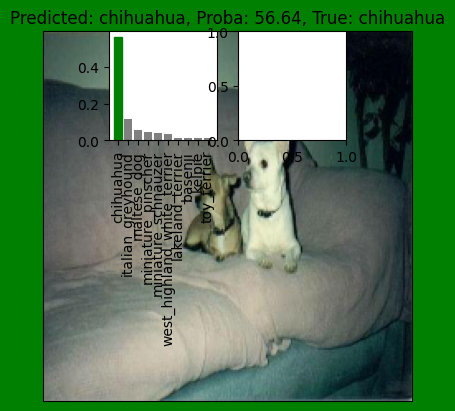

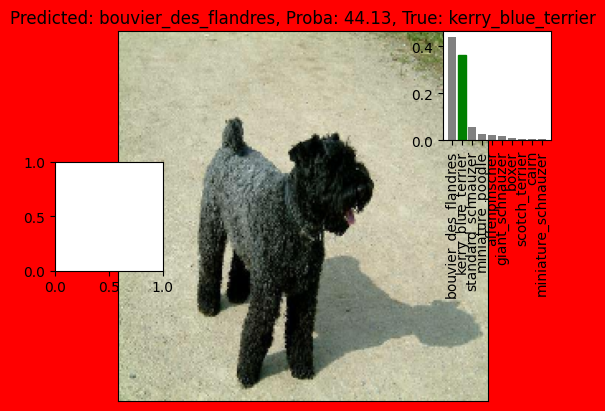

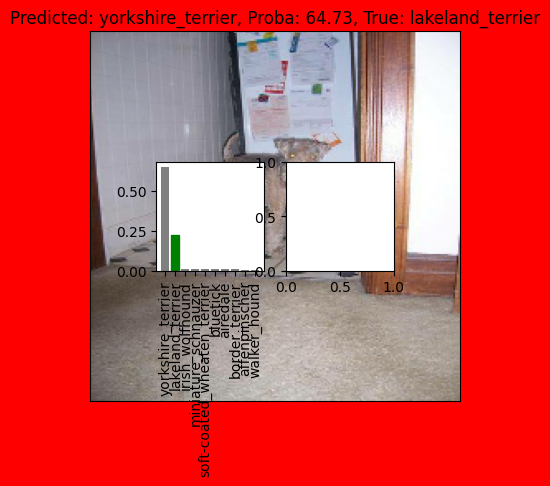

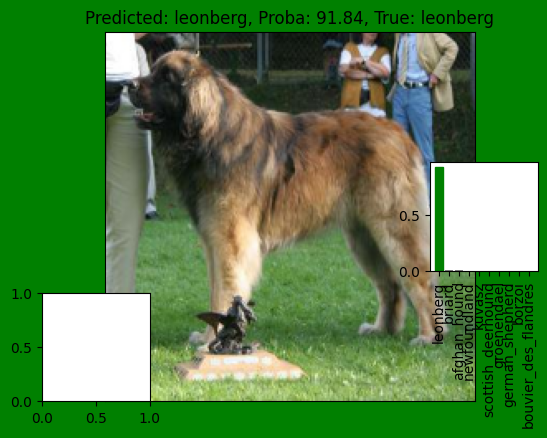

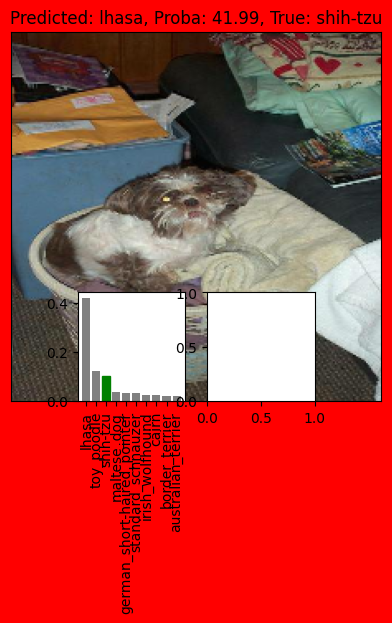

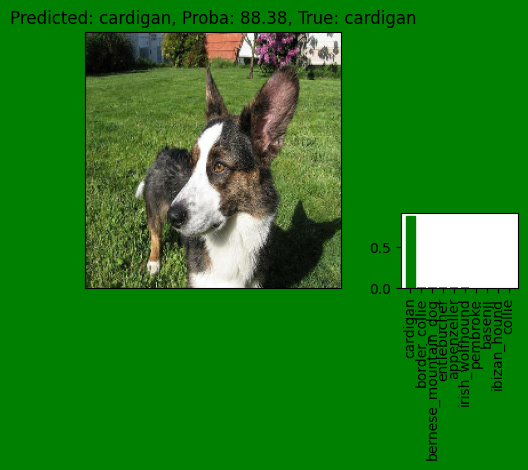

In [ ]:
i_multiplier=0
num_rows=3
num_cols=2
num_images=num_rows*num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(preds,images,labels,i+i_multiplier)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_top_10_preds(preds,labels,i+i_multiplier)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show() # Display the figure after all subplots are created

## Saving and reloading a model

In [30]:
def save_model(model,suffix=None):
  #Create a directory path for our model in the models folder
  modeldir=os.path.join("Dog-breed-classification-data/models",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path=modeldir+"-"+suffix+".h5"
  print("Saving model to path ",model_path,"...")
  model.save(model_path)
  return model_path

In [64]:
def load_model(model_path):
  print("Loading saved model from path ",model_path,"...")
  model=tf_keras.models.load_model(model_path,
                                   custom_objects={"KerasLayer":hub.KerasLayer})
  return model

Saving and loading our model

In [156]:
model_path=save_model(model,suffix="1000images-inception_v3-Adam")

Saving model to path  Dog-breed-classification-data/models/20250718-12481752842939-1000images-inception_v3-Adam.h5 ...


/home/saksham/miniconda3/envs/gpu-final/lib/python3.11/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [57]:
loaded_1000_images_model=load_model(model_path)

Loading saved model from path  Dog-breed-classification-data/models/20250718-11181752837509-1000images-mobilenetv2-Adam.h5 ...


In [157]:
model.evaluate(val_batch)

7/7 [==============================] - 1s 77ms/step - loss: 0.6576 - accuracy: 0.8100


[0.6575766205787659, 0.8100000023841858]

In [59]:
loaded_1000_images_model.evaluate(val_batch)

7/7 [==============================] - 2s 77ms/step - loss: 1.3592 - accuracy: 0.6200


[1.3592405319213867, 0.6200000047683716]

In [65]:
loaded_inception_model=load_model("Dog-breed-classification-data/models/20250718-13071752844072-full-image-set-test-inception_v3-Adam.h5")

Loading saved model from path  Dog-breed-classification-data/models/20250718-13071752844072-full-image-set-test-inception_v3-Adam.h5 ...


In [69]:
loaded_inception_model.evaluate(full_data_val)

2025-07-21 19:00:19.275290: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.40GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


63/64 [============================>.] - ETA: 0s - loss: 0.0093 - accuracy: 0.9990

2025-07-21 19:00:27.547314: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.36GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


64/64 [==============================] - 12s 131ms/step - loss: 0.0093 - accuracy: 0.9990


[0.009283136576414108, 0.9990220069885254]

In [81]:
loaded_inception_model2=load_model("Dog-breed-classification-data/models/20250718-12531752843192-full-data-inception_v3-Adam-best.h5")

Loading saved model from path  Dog-breed-classification-data/models/20250718-12531752843192-full-data-inception_v3-Adam-best.h5 ...


In [82]:
loaded_inception_model2.evaluate(full_data_val)

64/64 [==============================] - 7s 93ms/step - loss: 0.1031 - accuracy: 0.9711


[0.10314089804887772, 0.9711491465568542]

In [72]:
loaded_inception_model3=load_model("Dog-breed-classification-data/models/20250718-21491752875356-full-imageset-finetune-inception_v3-adam.h5")

Loading saved model from path  Dog-breed-classification-data/models/20250718-21491752875356-full-imageset-finetune-inception_v3-adam.h5 ...


In [73]:
loaded_inception_model3.evaluate(full_data_val)

64/64 [==============================] - 7s 100ms/step - loss: 0.4269 - accuracy: 0.9658


[0.42688924074172974, 0.9657701849937439]

In [79]:
loaded_inception_model4=tf.keras.models.load_model("Dog-breed-classification-data/models/20250719-15461752940012-full-imageset-inception_v3-augmentation-adam.h5")

In [80]:
loaded_inception_model4.evaluate(full_data_val)

64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 128ms/step - accuracy: 0.9300 - loss: 0.2251


[0.22478973865509033, 0.9290953278541565]

## Training model on all(10000+) images

In [41]:
len(x),len(y)

(10222, 10222)

In [42]:
from sklearn.model_selection import train_test_split

x_train1,x_val1,y_train1,y_val1=train_test_split(x,y,test_size=0.2)

len(x_train1),len(y_train1),len(x_val1),len(y_val1)

(8177, 8177, 2045, 2045)

In [75]:
#Create data batch
full_data_train=create_batches(x_train1,y_train1)
full_data_val=create_batches(x_val1,y_val1,valid_set=True)

Creating training set batches...
Creating valid set batches...


In [46]:
#Create callbacks
full_model_tensorboard=create_tensorboard_callback()
full_model_early_stopping=tf_keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                            patience=3)


In [55]:
full_model=create_model()
full_model.fit(x=full_data_train,
               validation_data=full_data_val,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Building model with:  https://tfhub.dev/google/imagenet/resnet_v2_101/classification/5
Epoch 1/100


I0000 00:00:1753122785.597299     579 cuda_dnn.cc:529] Loaded cuDNN version 91001
I0000 00:00:1753122787.223955     577 service.cc:148] XLA service 0x7eaaf9d8c2c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753122787.224007     577 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2025-07-21 18:33:07.252804: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1753122787.430980     577 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


256/256 [==============================] - 49s 152ms/step - loss: 1.6634 - accuracy: 0.6110 - val_loss: 1.0059 - val_accuracy: 0.7296
Epoch 2/100
256/256 [==============================] - 38s 150ms/step - loss: 0.6077 - accuracy: 0.8166 - val_loss: 1.0120 - val_accuracy: 0.7262
Epoch 3/100
256/256 [==============================] - 39s 152ms/step - loss: 0.3823 - accuracy: 0.8843 - val_loss: 1.0650 - val_accuracy: 0.7423
Epoch 4/100
256/256 [==============================] - 39s 154ms/step - loss: 0.2554 - accuracy: 0.9199 - val_loss: 1.0602 - val_accuracy: 0.7311
Epoch 5/100
256/256 [==============================] - 40s 154ms/step - loss: 0.1866 - accuracy: 0.9426 - val_loss: 1.1096 - val_accuracy: 0.7315
Epoch 6/100
256/256 [==============================] - 40s 155ms/step - loss: 0.1397 - accuracy: 0.9571 - val_loss: 1.1273 - val_accuracy: 0.7345


In [76]:
full_model.evaluate(full_data_val)

64/64 [==============================] - 13s 209ms/step - loss: 0.7105 - accuracy: 0.7946


[0.7105216383934021, 0.7946210503578186]

In [163]:
full_model_path=save_model(full_model,suffix="full-data-inception_v3-Adam")

Saving model to path  Dog-breed-classification-data/models/20250718-12531752843192-full-data-inception_v3-Adam.h5 ...


save_model(model,"8000-images-mobilenetv2-Adam")

In [165]:
full_data=create_batches(x,y)
full_model=create_model()
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])
# full_model_path=save_model(full_model,"full-image-set-mobilenetv2-Adam")

Creating training set batches...
Building model with:  https://tfhub.dev/google/imagenet/inception_v3/classification/5
Epoch 1/100
320/320 [==============================] - 38s 103ms/step - loss: 0.8547 - accuracy: 0.8097
Epoch 2/100
320/320 [==============================] - 33s 104ms/step - loss: 0.2254 - accuracy: 0.9292
Epoch 3/100
320/320 [==============================] - 34s 105ms/step - loss: 0.1534 - accuracy: 0.9521
Epoch 4/100
320/320 [==============================] - 34s 106ms/step - loss: 0.1064 - accuracy: 0.9680
Epoch 5/100
320/320 [==============================] - 36s 112ms/step - loss: 0.0791 - accuracy: 0.9775
Epoch 6/100
320/320 [==============================] - 36s 112ms/step - loss: 0.0606 - accuracy: 0.9840
Epoch 7/100
320/320 [==============================] - 35s 109ms/step - loss: 0.0527 - accuracy: 0.9846
Epoch 8/100
320/320 [==============================] - 34s 107ms/step - loss: 0.0405 - accuracy: 0.9910
Epoch 9/100
320/320 [============================

## Making predictions on the test data

In [167]:
full_model_path=save_model(full_model,"full-image-set-test-inception_v3-Adam")

Saving model to path  Dog-breed-classification-data/models/20250718-13071752844072-full-image-set-test-inception_v3-Adam.h5 ...


In [168]:
loaded_full_model=load_model(full_model_path)

Loading saved model from path  Dog-breed-classification-data/models/20250718-13071752844072-full-image-set-test-inception_v3-Adam.h5 ...


In [169]:
#Creating data batches for the test data
test_path="Dog-breed-classification-data/test/"
test_filenames=[test_path+fname for fname in os.listdir(test_path)]
test_data=create_batches(test_filenames,test_set=True)

Creating test data batches...


In [170]:
test_data,len(test_filenames)

(<_BatchDataset element_spec=TensorSpec(shape=(None, 299, 299, 3), dtype=tf.float32, name=None)>,
 10357)

In [171]:
test_predictions=loaded_full_model.predict(test_data,verbose=1)

324/324 [==============================] - 33s 100ms/step


In [172]:
np.savetxt("Dog-breed-classification-data/test_predictions.csv",test_predictions,delimiter=",")

## Submitting predictions to kaggle

In [173]:
test_preds=pd.DataFrame(columns=["id"]+list(unique_breeds))
test_preds.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [174]:
test_ids=[]
for ids in os.listdir("Dog-breed-classification-data/test"):
    test_ids.append(os.path.splitext(ids)[0])
len(test_ids)

10357

In [175]:
test_preds["id"]=test_ids

In [176]:
test_preds.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,f30e9a91acfb7e0fd1a3f9b91ca36914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e21d378710d164f126e7d0b380dc7a1a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6a2cfab843ba8a78ab3f179a56b9d8e2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,74343d0be2a7f40c4e9ea2e490a05159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,591d29a54620853d44332f81c07016f1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
test_predictions=np.loadtxt("Dog-breed-classification-data/test_predictions.csv",delimiter=",")
test_predictions.shape

(10357, 120)

In [178]:
test_preds[list(unique_breeds)]=test_predictions
test_preds.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,f30e9a91acfb7e0fd1a3f9b91ca36914,2.176180e-07,7.285115e-08,2.781838e-09,1.240650e-09,2.137379e-05,2.578327e-06,1.001203e-07,1.664582e-08,1.322860e-07,...,1.699739e-08,8.756657e-08,1.012988e-07,5.477741e-07,9.011084e-07,4.992991e-08,3.435952e-08,1.181396e-06,1.684273e-06,8.495855e-07
1,e21d378710d164f126e7d0b380dc7a1a,2.191883e-06,5.255303e-11,4.652614e-10,1.697259e-09,6.633817e-07,1.818088e-10,6.265535e-07,3.054649e-13,8.302939e-09,...,3.599937e-07,7.247389e-11,6.838293e-10,5.825810e-10,3.537733e-10,7.321056e-10,1.552243e-13,1.241692e-08,4.303429e-12,6.157682e-07
2,6a2cfab843ba8a78ab3f179a56b9d8e2,3.459516e-11,3.920172e-09,9.112439e-11,2.380431e-10,7.721412e-10,3.905495e-11,1.021045e-07,8.814100e-12,6.863515e-11,...,4.994786e-11,2.183552e-10,7.473802e-11,9.345364e-11,2.564856e-10,5.254442e-13,1.636854e-09,3.227653e-10,1.873953e-06,3.084706e-09
3,74343d0be2a7f40c4e9ea2e490a05159,3.566196e-07,1.874354e-11,1.581260e-07,5.382733e-10,5.604549e-10,1.191550e-09,7.450012e-11,1.745873e-12,3.753957e-10,...,4.060043e-09,2.984880e-08,3.578688e-08,1.280362e-07,6.176153e-09,9.365768e-11,6.412628e-08,3.398272e-08,1.403442e-10,2.725257e-10
4,591d29a54620853d44332f81c07016f1,4.487418e-11,1.341015e-10,5.707201e-12,3.114470e-13,9.942213e-09,2.661966e-10,1.866462e-10,1.004574e-12,5.643487e-12,...,3.646725e-09,1.913167e-10,8.307398e-12,7.758034e-10,5.342725e-13,3.026166e-13,3.563310e-12,1.275664e-08,2.741128e-10,3.727778e-08


In [179]:
test_preds.to_csv("Dog-breed-classification-data/submission_inception_v3.csv",index=False)

## Finetuning the model Inception_v3

Steps:
* Initial training- Train the default model with the trainable param for the base layer set as false and train only the dense layer for a few epochs
* unfreeze the base layer
* lower the learning rate
* continue training the model on the data for rest of the epochs

In [56]:
full_data_train,full_data_val

(<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>)

In [57]:
#Create callbacks
finetune_tensorboard=create_tensorboard_callback()
finetune_early_stopping=tf_keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                         patience=3)

In [58]:
fine_model=create_model()

Building model with:  https://tfhub.dev/google/imagenet/resnet_v2_101/classification/5


In [59]:
history=fine_model.fit(full_data_train,
                       validation_data=full_data_val,
                       epochs=NUM_EPOCHS,
                       callbacks=[finetune_tensorboard,finetune_early_stopping])

Epoch 1/100
256/256 [==============================] - 44s 147ms/step - loss: 1.6764 - accuracy: 0.6071 - val_loss: 0.9713 - val_accuracy: 0.7306
Epoch 2/100
256/256 [==============================] - 38s 150ms/step - loss: 0.6137 - accuracy: 0.8155 - val_loss: 0.9931 - val_accuracy: 0.7281
Epoch 3/100
256/256 [==============================] - 39s 153ms/step - loss: 0.3809 - accuracy: 0.8762 - val_loss: 1.0125 - val_accuracy: 0.7369
Epoch 4/100
256/256 [==============================] - 39s 154ms/step - loss: 0.2685 - accuracy: 0.9143 - val_loss: 1.0347 - val_accuracy: 0.7438
Epoch 5/100
256/256 [==============================] - 40s 154ms/step - loss: 0.1872 - accuracy: 0.9424 - val_loss: 1.0704 - val_accuracy: 0.7403
Epoch 6/100
256/256 [==============================] - 40s 155ms/step - loss: 0.1439 - accuracy: 0.9576 - val_loss: 1.0980 - val_accuracy: 0.7418
Epoch 7/100
256/256 [==============================] - 40s 157ms/step - loss: 0.1167 - accuracy: 0.9660 - val_loss: 1.1618 -

In [60]:
fine_model.layers[0].trainable=True

In [61]:
fine_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                   optimizer=tf_keras.optimizers.Adam(learning_rate=1e-5),
                   metrics=["accuracy"])
fine_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 1001)              44677609  
                                                                 
 dense_4 (Dense)             (None, 120)               120240    
                                                                 
Total params: 44797849 (170.89 MB)
Trainable params: 44700185 (170.52 MB)
Non-trainable params: 97664 (381.50 KB)
_________________________________________________________________


In [62]:
history_fine_tune=fine_model.fit(full_data_train,
                                 validation_data=full_data_val,
                                 epochs=NUM_EPOCHS,
                                 initial_epoch=history.epoch[-1])

Epoch 7/100


2025-07-21 18:55:16.072010: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:497] Allocator (GPU_0_bfc) ran out of memory trying to allocate 49.00MiB (rounded to 51380224)requested by op sequential_4/keras_layer_4/StatefulPartitionedCall/StatefulPartitionedCall/StatefulPartitionedCall/train/resnet_v2_101/block2/unit_4/bottleneck_v2/preact/FusedBatchNormV3
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2025-07-21 18:55:16.072264: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1053] BFCAllocator dump for GPU_0_bfc
2025-07-21 18:55:16.072288: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1060] Bin (256): 	Total Chunks: 283, Chunks in use: 281. 70.8KiB allocated for chunks. 70.2KiB in use in bin. 40.8KiB client-requested in use in bin.
2025-07-21 18:55:16.072299: I external/local_xla/xla/tsl/framework/bfc_al

ResourceExhaustedError: Graph execution error:

Detected at node train/resnet_v2_101/block2/unit_4/bottleneck_v2/preact/FusedBatchNormV3 defined at (most recent call last):
<stack traces unavailable>
OOM when allocating tensor with shape[32,512,28,28] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node train/resnet_v2_101/block2/unit_4/bottleneck_v2/preact/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_207215]

In [ ]:
fine_model_path=save_model(fine_model,suffix="full-imageset-finetune-resnet_v2-adam")

In [ ]:
fine_model.evaluate(full_data_val)

## Finetuning by adding layers

### 1. Data augmentation

In [86]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.applications import InceptionV3

def create_model_aug(input_shape=INPUT_SHAPE, output_size=OUTPUT_SHAPE):
    print("Building model with: keras.applications.InceptionV3")

    # 1. Define the input layer
    input_layer = layers.Input(shape=input_shape, name="input_layer")

    # 2. Define the data augmentation layer
    data_augmentation = tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.2)
    ], name="data_augmentation")

    # 3. Define the InceptionV3 base model
    # Do NOT use the input_tensor argument here
    base_model = InceptionV3(include_top=False,
                             weights='imagenet',
                             pooling='avg',
                             input_shape=input_shape)
    base_model.trainable = False # Freeze the base model

    # 4. Link the layers together
    x = data_augmentation(input_layer)
    x = base_model(x, training=False) # Pass the augmented data to the base model
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(output_size, activation="softmax", name="output_layer")(x)

    # 5. Create the final model
    model = Model(inputs=input_layer, outputs=predictions)

    # Compile the model
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

    return model
    
aug_model=create_model_aug()
aug_model.summary()

Building model with: keras.applications.InceptionV3


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 299, 299, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ inception_v3 (Functional)       │ (None, 2048)           │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 120)            │       245,880 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,048,664 (84.11 MB)

 Trainable params: 245,880 (960.47 KB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [87]:
history=aug_model.fit(full_data_train,
              validation_data=full_data_val,
              epochs=NUM_EPOCHS,
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=3,restore_best_weights=True)])

Epoch 1/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 70s 122ms/step - accuracy: 0.3258 - loss: 3.3152 - val_accuracy: 0.8494 - val_loss: 0.5457
Epoch 2/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 56s 110ms/step - accuracy: 0.6801 - loss: 1.2019 - val_accuracy: 0.8577 - val_loss: 0.4217
Epoch 3/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 55s 108ms/step - accuracy: 0.6997 - loss: 1.0850 - val_accuracy: 0.8675 - val_loss: 0.4041
Epoch 4/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 55s 108ms/step - accuracy: 0.7184 - loss: 1.0219 - val_accuracy: 0.8758 - val_loss: 0.3968
Epoch 5/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 54s 106ms/step - accuracy: 0.7268 - loss: 0.9938 - val_accuracy: 0.8694 - val_loss: 0.4061
Epoch 6/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 82s 106ms/step - accuracy: 0.7369 - loss: 0.9415 - val_accuracy: 0.8680 - val_loss: 0.4093
Epoch 7/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 55s 107ms/step - accuracy: 0.7442 - loss: 0.9255 - val_accuracy: 0.8763 - val_loss: 0.3966
Epoch 8/100
512/512 ━━━━━━━━━━━━━━━━━━━━ 55s 108ms/step - accuracy: 0.7481 -

In [88]:
aug_model.evaluate(full_data_val)

128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 85ms/step - accuracy: 0.8772 - loss: 0.3882


[0.39657479524612427, 0.8762836456298828]

In [90]:
aug_model.get_layer("inception_v3").trainable=True
aug_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
                  metrics=["accuracy"])

In [92]:
aug_model.fit(full_data_train,validation_data=full_data_val,
              epochs=50,
              initial_epoch=len(history.epoch),
              callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)])

Epoch 11/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 319s 505ms/step - accuracy: 0.6327 - loss: 1.3812 - val_accuracy: 0.8621 - val_loss: 0.4343
Epoch 12/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 262s 511ms/step - accuracy: 0.7217 - loss: 0.9394 - val_accuracy: 0.8655 - val_loss: 0.4294
Epoch 13/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 257s 503ms/step - accuracy: 0.7606 - loss: 0.7948 - val_accuracy: 0.8689 - val_loss: 0.4138
Epoch 14/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 259s 506ms/step - accuracy: 0.7810 - loss: 0.7429 - val_accuracy: 0.8729 - val_loss: 0.4011
Epoch 15/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 261s 510ms/step - accuracy: 0.7917 - loss: 0.6826 - val_accuracy: 0.8665 - val_loss: 0.4078
Epoch 16/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 264s 515ms/step - accuracy: 0.7930 - loss: 0.6617 - val_accuracy: 0.8709 - val_loss: 0.4021
Epoch 17/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 258s 504ms/step - accuracy: 0.8140 - loss: 0.5872 - val_accuracy: 0.8645 - val_loss: 0.4248
Epoch 18/50
512/512 ━━━━━━━━━━━━━━━━━━━━ 260s 507ms/step - accuracy: 

In [93]:
aug_model.evaluate(full_data_val)

128/128 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.8736 - loss: 0.3886


[0.401128351688385, 0.8728606104850769]

In [94]:
aug_model.evaluate(full_data_train)

512/512 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.9440 - loss: 0.1703


[0.16956353187561035, 0.9444783926010132]

In [95]:
save_model(aug_model,suffix="full-imageset-inception_v3-augmentation-adam")

Saving model to path  Dog-breed-classification-data/models/20250719-15461752940012-full-imageset-inception_v3-augmentation-adam.h5 ...


'Dog-breed-classification-data/models/20250719-15461752940012-full-imageset-inception_v3-augmentation-adam.h5'

In [96]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]